In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import requests
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [12]:
# or we can download directly, i.e.
#nltk.download(['punkt','stopwords'])

In [14]:
import pandas as pd

df = pd.read_csv('test.csv')  # Make sure 'test.csv' exists in your working directory
df.head()
import pandas as pd

df = pd.read_csv('train.csv')  # Make sure 'train.csv' exists in your working directory
df.head()



,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,https://indianexpress.com/article/business/com...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,https://indianexpress.com/article/business/eco...,business


DATA CLEANING

In [20]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Check for duplicates in train.csv
train_duplicates = train_df.duplicated().sum()
print(f"Number of duplicate rows in train.csv: {train_duplicates}")

# Check for duplicates in test.csv
test_duplicates = test_df.duplicated().sum()
print(f"Number of duplicate rows in test.csv: {test_duplicates}")


Number of duplicate rows in train.csv: 0
Number of duplicate rows in test.csv: 0


In [22]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Check for missing values in train.csv
print("Missing values in train.csv:")
print(train_df.isnull().sum())

# Check for missing values in test.csv
print("\nMissing values in test.csv:")
print(test_df.isnull().sum())


Missing values in train.csv:
headlines      0
description    0
content        0
url            0
category       0
dtype: int64

Missing values in test.csv:
headlines      0
description    0
content        0
url            0
category       0
dtype: int64


Text standardization completed. Cleaned files saved as 'cleaned_train.csv' and 'cleaned_test.csv'.


train.csv: 5,520 URLs are invalid or unreachable.
test.csv: 2,000 URLs are invalid or unreachableThese could be due to broken links, outdated URLs, or formatting issues. You can choose to:

Remove rows with invalid URLs
Attempt to fix or replace them if you have updated sources
Keep them if the URL isn't critical to your analysis.

In [ ]:
import pandas as pd
import requests

# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Function to validate URLs
def validate_url(url):
    try:
        response = requests.head(url, allow_redirects=True, timeout=5)
        return response.status_code == 200
    except requests.RequestException:
        return False

# Validate URLs in train.csv
train_df['url_valid'] = train_df['url'].apply(validate_url)
invalid_train_urls = train_df[~train_df['url_valid']].shape[0]
print(f"Number of invalid or unreachable URLs in train.csv: {invalid_train_urls}")

# Validate URLs in test.csv
test_df['url_valid'] = test_df['url'].apply(validate_url)
invalid_test_urls = test_df[~test_df['url_valid']].shape[0]
print(f"Number of invalid or unreachable URLs in test.csv: {invalid_test_urls}")


Code to remove URL's

In [ ]:
import pandas as pd
import requests

# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Function to validate URLs
def validate_url(url):
    try:
        response = requests.head(url, allow_redirects=True, timeout=5)
        return response.status_code == 200
    except requests.RequestException:
        return False

# Validate and filter train.csv
train_df['url_valid'] = train_df['url'].apply(validate_url)
train_df = train_df[train_df['url_valid']]
train_df.drop(columns=['url_valid'], inplace=True)

# Validate and filter test.csv
test_df['url_valid'] = test_df['url'].apply(validate_url)
test_df = test_df[test_df['url_valid']]
test_df.drop(columns=['url_valid'], inplace=True)

# Save cleaned datasets
train_df.to_csv('cleaned_train.csv', index=False)
test_df.to_csv('cleaned_test.csv', index=False)

print("Rows with invalid URLs have been removed.")


Code to Check and Fix Data Types

In [ ]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Display data types
print("Data types in train.csv:")
print(train_df.dtypes)

print("\nData types in test.csv:")
print(test_df.dtypes)

# Function to attempt conversion to numeric or datetime
def convert_data_types(df):
    for column in df.columns:
        try:
            df[column] = pd.to_numeric(df[column])
        except:
            try:
                df[column] = pd.to_datetime(df[column])
            except:
                pass
    return df

# Apply conversion
train_df = convert_data_types(train_df)
test_df = convert_data_types(test_df)

# Save corrected datasets
train_df.to_csv('corrected_train.csv', index=False)
test_df.to_csv('corrected_test.csv', index=False)

# Confirm completion
print("✅ Data type correction completed and files saved.")



Standardise & Group Categories

In [ ]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Function to standardize and group categories
def standardize_category(category):
    category = category.lower()
    if category in ['business', 'economy', 'market']:
        return 'business'
    elif category in ['sports', 'cricket', 'football', 'tennis']:
        return 'sports'
    elif category in ['technology', 'tech', 'ai', 'privacy']:
        return 'technology'
    elif category in ['education', 'admissions', 'scholarships', 'policy']:
        return 'education'
    elif category in ['entertainment', 'bollywood', 'hollywood', 'cinema']:
        return 'entertainment'
    else:
        return 'miscellaneous'

# Apply the function
train_df['category'] = train_df['category'].apply(standardize_category)
test_df['category'] = test_df['category'].apply(standardize_category)

# Save the cleaned datasets
train_df.to_csv('grouped_train.csv', index=False)
test_df.to_csv('grouped_test.csv', index=False)

print("Category standardization and grouping completed.")


In [ ]:
import pandas as pd
import re

# Load the dataset
test_df = pd.read_csv('test.csv')

# 1. Multi-Domain Categorization
def standardize_category(category):
    category = category.lower()
    if category in ['business', 'economy', 'market']:
        return 'business'
    elif category in ['sports', 'cricket', 'football', 'tennis']:
        return 'sports'
    elif category in ['technology', 'tech', 'ai', 'privacy']:
        return 'technology'
    elif category in ['education', 'admissions', 'scholarships', 'policy']:
        return 'education'
    elif category in ['entertainment', 'bollywood', 'hollywood', 'cinema']:
        return 'entertainment'
    else:
        return 'miscellaneous'

test_df['category'] = test_df['category'].apply(standardize_category)

# 2. Clean content for NER
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

test_df['content'] = test_df['content'].astype(str).apply(clean_text)

# 3. Length Filtering
def filter_length(text, min_words=5, max_words=500):
    word_count = len(text.split())
    return min_words <= word_count <= max_words

test_df = test_df[test_df['content'].apply(filter_length)]

# Save cleaned data
test_df.to_csv('cleaned_test.csv', index=False)
print("Cleaned test.csv saved.")


Feature engineering - Test preprocesing & feature generation. Text Preprocessing:

Combine relevant text fields.
Clean text (lowercase, remove punctuation).
Tokenize and remove stopwords.
Apply lemmatization.
Feature Generation:

Text length (word count).
TF-IDF vectorization.
Keyword presence (e.g., domain-specific terms).

In [16]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load dataset
df = pd.read_csv("train.csv")

# Combine text fields
df['full_text'] = df['headlines'].fillna('') + ' ' + df['description'].fillna('') + ' ' + df['content'].fillna('')

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word.isalpha()]
    return ' '.join(tokens)

# Apply preprocessing
df['clean_text'] = df['full_text'].apply(preprocess_text)


[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


OSError: No such file or directory: 'C:\\Users\\NB331097\\AppData\\Roaming\\nltk_data\\corpora\\wordnet\\lexnames'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Text length feature
df['text_length'] = df['clean_text'].apply(lambda x: len(x.split()))

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf.fit_transform(df['clean_text'])

# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Combine with original features
features_df = pd.concat([df[['category', 'text_length']], tfidf_df], axis=1)




Models

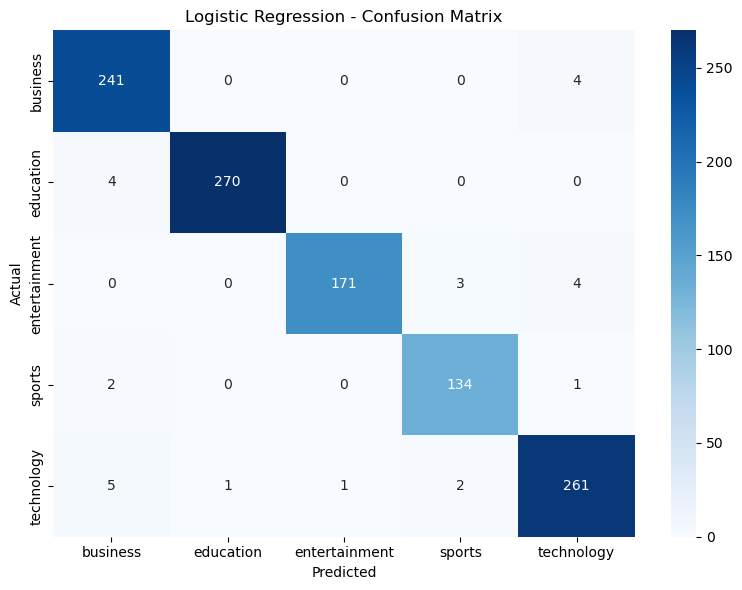


Logistic Regression - Classification Report:
               precision    recall  f1-score   support

     business       0.96      0.98      0.97       245
    education       1.00      0.99      0.99       274
entertainment       0.99      0.96      0.98       178
       sports       0.96      0.98      0.97       137
   technology       0.97      0.97      0.97       270

     accuracy                           0.98      1104
    macro avg       0.98      0.97      0.98      1104
 weighted avg       0.98      0.98      0.98      1104



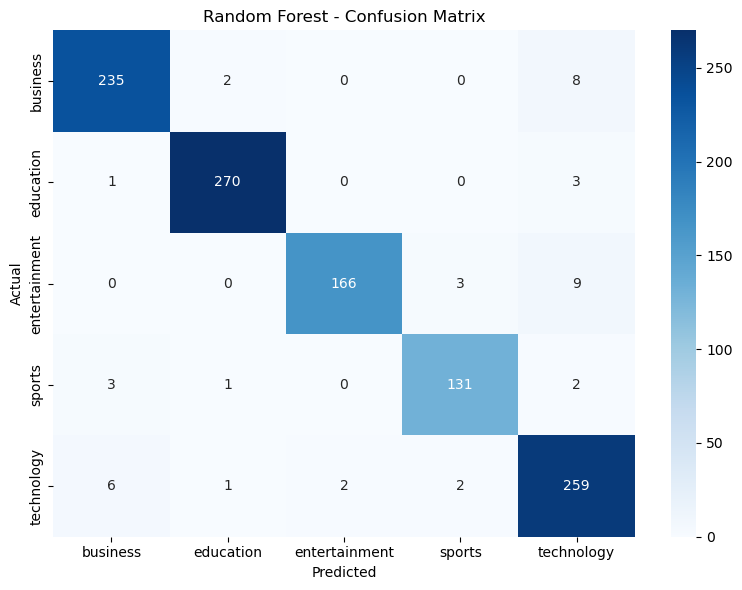


Random Forest - Classification Report:
               precision    recall  f1-score   support

     business       0.96      0.96      0.96       245
    education       0.99      0.99      0.99       274
entertainment       0.99      0.93      0.96       178
       sports       0.96      0.96      0.96       137
   technology       0.92      0.96      0.94       270

     accuracy                           0.96      1104
    macro avg       0.96      0.96      0.96      1104
 weighted avg       0.96      0.96      0.96      1104



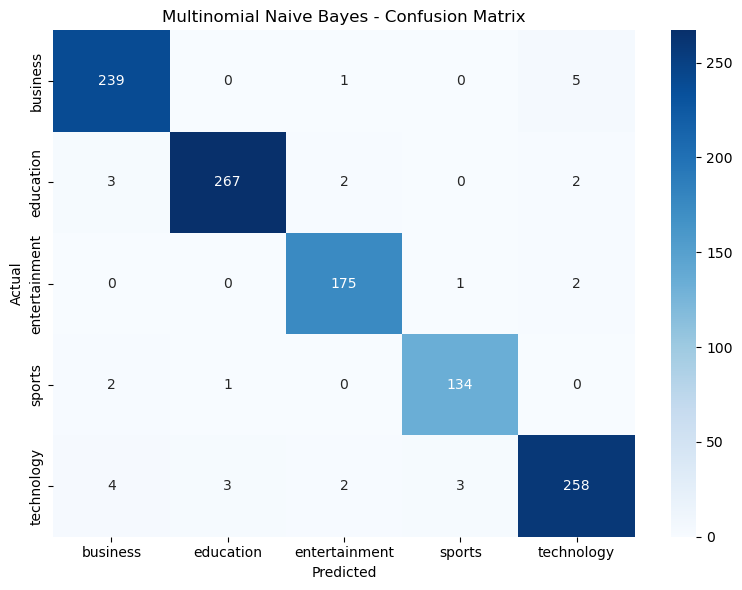


Multinomial Naive Bayes - Classification Report:
               precision    recall  f1-score   support

     business       0.96      0.98      0.97       245
    education       0.99      0.97      0.98       274
entertainment       0.97      0.98      0.98       178
       sports       0.97      0.98      0.97       137
   technology       0.97      0.96      0.96       270

     accuracy                           0.97      1104
    macro avg       0.97      0.97      0.97      1104
 weighted avg       0.97      0.97      0.97      1104



In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv("train.csv")

# Combine text fields into a single feature
df['full_text'] = df['headlines'].fillna('') + ' ' + df['description'].fillna('') + ' ' + df['content'].fillna('')

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf.fit_transform(df['full_text'])
y = df['category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train, predict and visualize confusion matrix
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    # Classification Report
    print(f"\n{model_name} - Classification Report:")
    print(classification_report(y_test, y_pred))

# Evaluate Logistic Regression
evaluate_model(LogisticRegression(max_iter=1000), "Logistic Regression")

# Evaluate Random Forest
evaluate_model(RandomForestClassifier(n_estimators=100, random_state=42), "Random Forest")

# Evaluate Multinomial Naive Bayes
evaluate_model(MultinomialNB(), "Multinomial Naive Bayes")



Hyperparamter tuning: Hyperparameter Tuning
This will help optimize model performance using techniques like:

Grid Search
Random Search
Cross-valid

Hyperparameter Tuning Results (Logistic Regression)
Using GridSearchCV, we tuned the Logistic Regression model on TF-IDF features. Here's what we found:ation

C:\Users\NB331097\AppData\Local\Temp\ipykernel_4256\2024923912.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')


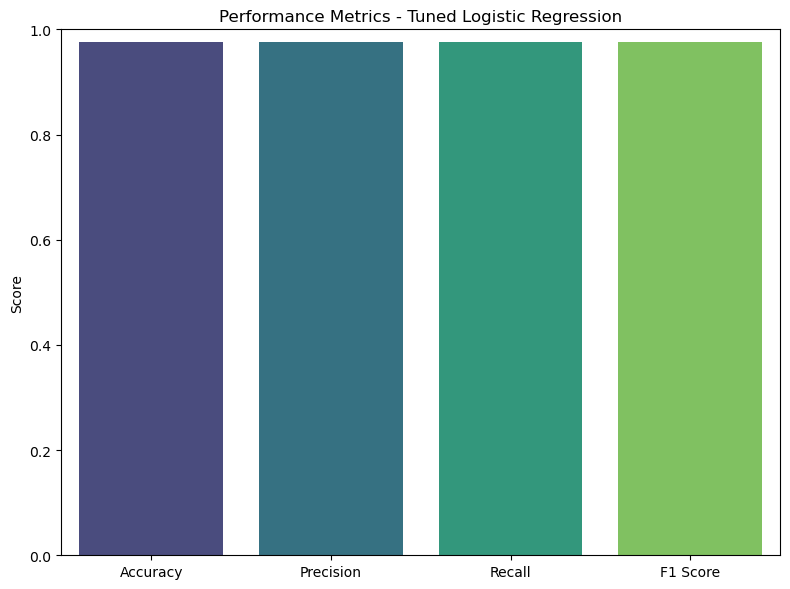

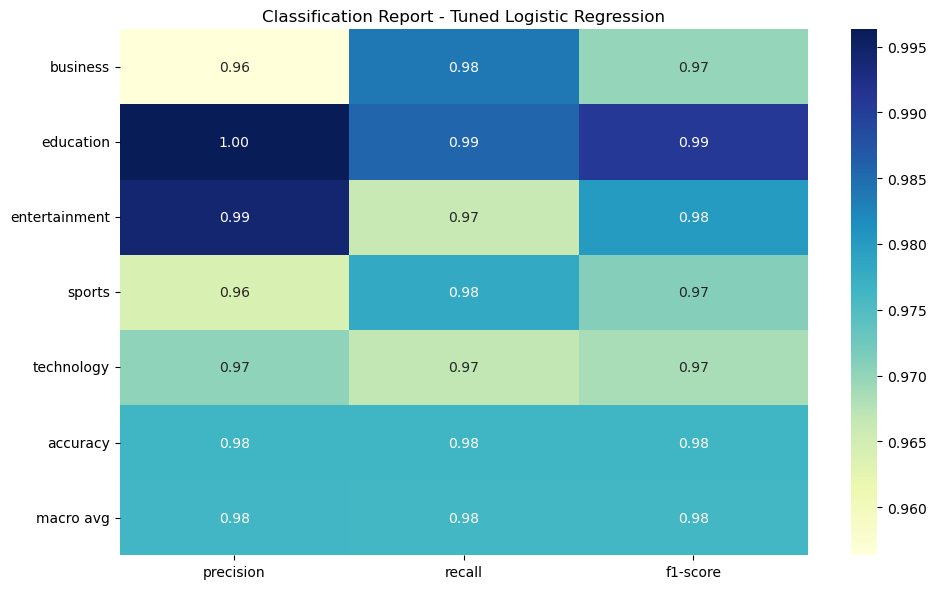

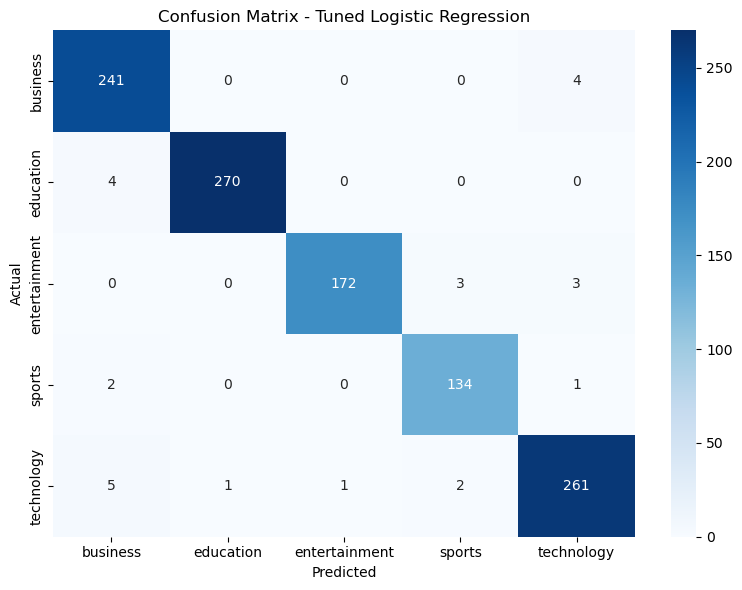

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv("train.csv")

# Combine text fields
df['full_text'] = df['headlines'].fillna('') + ' ' + df['description'].fillna('') + ' ' + df['content'].fillna('')

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf.fit_transform(df['full_text'])
y = df['category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train tuned Logistic Regression model
model = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Performance metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
report = classification_report(y_test, y_pred, output_dict=True)

# Bar plot of metrics
metrics = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1}
plt.figure(figsize=(8, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')
plt.title('Performance Metrics - Tuned Logistic Regression')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Classification report heatmap
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Classification Report - Tuned Logistic Regression')
plt.tight_layout()
plt.show()

# Confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix - Tuned Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


In [25]:
{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

Streamlit

In [34]:
streamlit run app.py


SyntaxError: invalid syntax (507122745.py, line 1)

In [32]:
import streamlit as st
import pandas as pd
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Load trained model and TF-IDF vectorizer
model = joblib.load("logistic_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

# Streamlit UI
st.title("News Article Category Classifier")
st.write("Enter a news article or headline below to predict its category:")

user_input = st.text_area("Article Text", height=200)

if st.button("Predict Category"):
    if user_input.strip() == "":
        st.warning("Please enter some text.")
    else:
        # Preprocess and vectorize
        X_input = vectorizer.transform([user_input])
        prediction = model.predict(X_input)[0]
        probabilities = model.predict_proba(X_input)[0]

        st.success(f"Predicted Category: **{prediction}**")

        # Show confidence scores
        st.subheader("Confidence Scores:")
        prob_df = pd.DataFrame({
            "Category": model.classes_,
            "Probability": probabilities
        }).sort_values(by="Probability", ascending=False)

        st.dataframe(prob_df.reset_index(drop=True))


KeyError: 239